## *Import Libraries*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
!unzip /content/drive/MyDrive/cars_ohe.zip

Archive:  /content/drive/MyDrive/cars_ohe.zip
  inflating: cars_ohe.csv            


In [5]:
df = pd.read_csv("/content/cars_ohe.csv")

In [6]:
def load_inputs_outputs():

  X = df.drop(["price"],axis = "columns")
  y = df.price

  return X,y

## *Load Inputs and Targets*

In [7]:
X,y = load_inputs_outputs()  

## *Split Data*

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)

## *Numpy Transform*

In [10]:
X_train,Y_train = np.asarray(X_train),np.asarray(Y_train)

In [11]:
X_test,Y_test = np.asarray(X_test),np.asarray(Y_test)

The Numpy library allows the transformation of variables to arrays. This allows the training algorithm to train faster.

# *XGBoost*

In [12]:
from xgboost import XGBRegressor

## Number Estimators Ideal

We will use the mean square error as a metric, which consists of measuring the average error between the original and predicted values. We will use a range of estimators from 100 to 1000 estimators of 10 in 10.

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
n_estimators = np.arange(100,1010,10)

In [27]:
class Estimators():

  def __init__(self,max_depth):

    self.max_depth = max_depth

  def EstimatorsFit(self):


    mse_train_list,mse_test_list = list(),list()

    for n_estimator in n_estimators:

      model = XGBRegressor(max_depth = self.max_depth,
                   learning_rate=0.01,
                   n_estimators=n_estimator,
                   subsample=0.8,
                   silent=True,
                   random_state = 42,
                   verbose = 0,
                   tree_method='gpu_hist')
    
      model.fit(X_train,Y_train)

      pred_train,pred_test = model.predict(X_train),model.predict(X_test)
      mse_train,mse_test = mean_squared_error(Y_train,pred_train),mean_squared_error(Y_test,pred_test)


      mse_train_list.append(mse_train)
      mse_test_list.append(mse_test)

    return mse_train_list,mse_test_list



  def History(mse_train_list,mse_test_list):

    fig,ax = plt.subplots(1,1,figsize = (20,8))
    ax.set_title("Number of Estimators")
    ax.plot(n_estimators,mse_train_list,label = "MSE Train")
    ax.plot(n_estimators,mse_test_list,label = "MSE Test")
    ax.legend()



## *First Model*



In [16]:
sns.set_style("whitegrid")

In [28]:
evaluate_estimators = Estimators(max_depth = 4)

In [18]:
mse_train_list,mse_test_list = evaluate_estimators.EstimatorsFit()

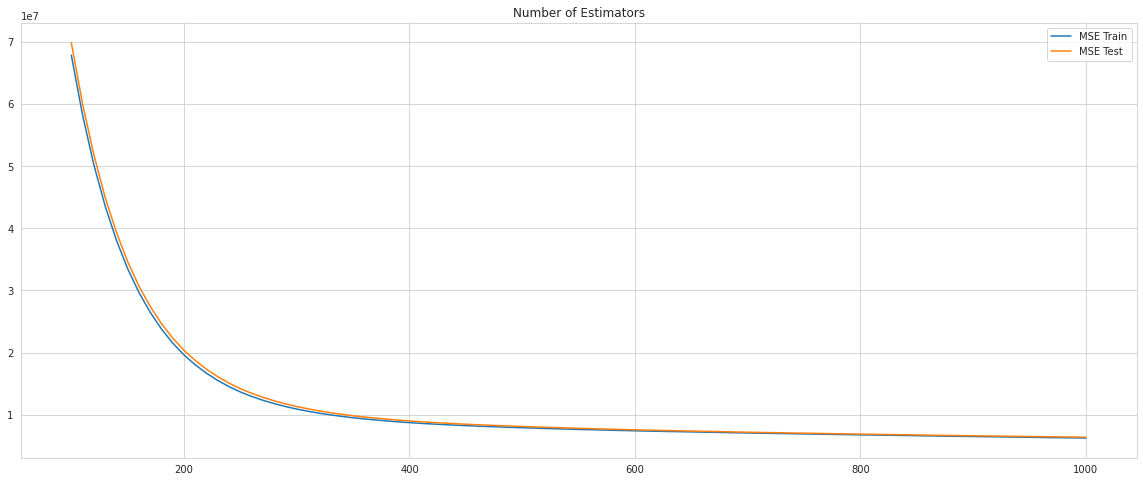

In [19]:
_ = Estimators.History(mse_train_list,mse_test_list)

In [31]:
df_estimators = pd.DataFrame({"Estimators":n_estimators,"MSE Train":mse_train_list,"MSE test":mse_test_list})

In [33]:
df_estimators.query("Estimators > 800")

,Estimators,MSE Train,MSE test
71,810,6.722375e+06,6.842067e+06
72,820,6.694565e+06,6.814678e+06
73,830,6.665883e+06,6.786119e+06
74,840,6.639272e+06,6.757266e+06
75,850,6.608606e+06,6.729103e+06
76,860,6.579484e+06,6.699720e+06
77,870,6.554096e+06,6.672732e+06
78,880,6.528502e+06,6.648662e+06
79,890,6.503009e+06,6.623262e+06
80,900,6.478089e+06,6.601195e+06


For this case we can use a maximum number of estimators of 1000.

In [34]:
xgb = XGBRegressor(max_depth = 4,
                   learning_rate=0.01,
                   n_estimators=1000,
                   subsample=0.8,
                   silent=True,
                   random_state = 42,
                   verbose = 0,
                   tree_method='gpu_hist')

In [35]:
xgb.fit(X_train,Y_train)

XGBRegressor(learning_rate=0.01, max_depth=4, n_estimators=1000,
             random_state=42, silent=True, subsample=0.8,
             tree_method='gpu_hist', verbose=0)

In [36]:
print("MSE train: {}".format(mean_squared_error(Y_train,xgb.predict(X_train))))
print("MSE test: {}".format(mean_squared_error(Y_test,xgb.predict(X_test))))

MSE train: 6234236.213113722
MSE test: 6364715.41894107


## *Second Model*



In [37]:
evaluate_estimators = Estimators(max_depth = 7)

In [38]:
mse_train_list,mse_test_list = evaluate_estimators.EstimatorsFit()

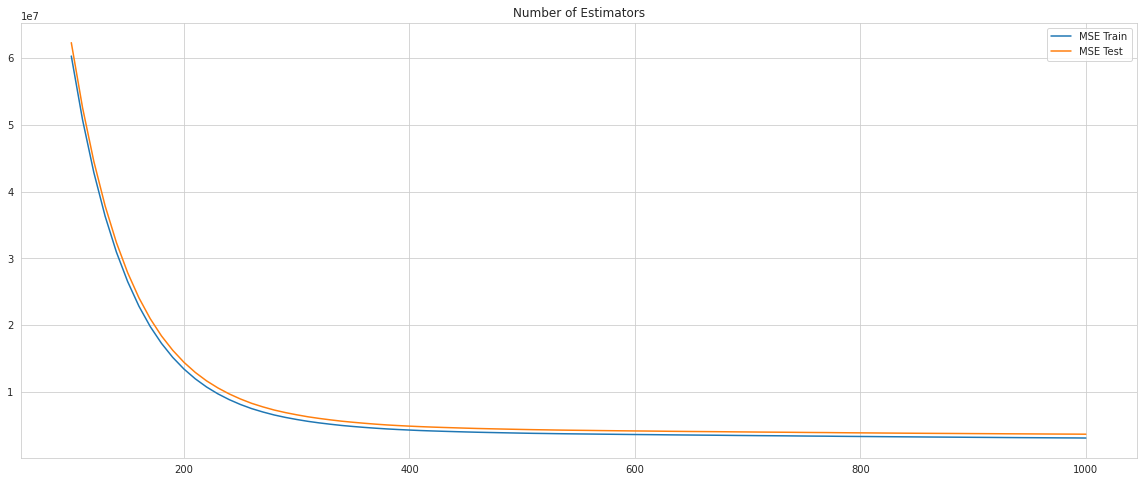

In [39]:
_ = Estimators.History(mse_train_list,mse_test_list)

In [40]:
df_estimators = pd.DataFrame({"Estimators":n_estimators,"MSE Train":mse_train_list,"MSE test":mse_test_list})

In [41]:
df_estimators.query("Estimators > 800")

,Estimators,MSE Train,MSE test
71,810,3.314752e+06,3.858372e+06
72,820,3.300623e+06,3.844581e+06
73,830,3.288430e+06,3.833102e+06
74,840,3.275562e+06,3.821095e+06
75,850,3.262508e+06,3.809613e+06
76,860,3.249451e+06,3.798995e+06
77,870,3.238829e+06,3.789806e+06
78,880,3.227334e+06,3.781534e+06
79,890,3.216145e+06,3.771786e+06
80,900,3.203753e+06,3.760776e+06


In [42]:
xgb2 = XGBRegressor(max_depth = 7,
                   learning_rate=0.01,
                   n_estimators=1000,
                   subsample=0.8,
                   silent=True,
                   random_state = 42,
                   verbose = 0,
                   tree_method='gpu_hist')

In [43]:
xgb2.fit(X_train,Y_train)

XGBRegressor(learning_rate=0.01, max_depth=7, n_estimators=1000,
             random_state=42, silent=True, subsample=0.8,
             tree_method='gpu_hist', verbose=0)

In [44]:
print("MSE train: {}".format(mean_squared_error(Y_train,xgb2.predict(X_train))))
print("MSE test: {}".format(mean_squared_error(Y_test,xgb2.predict(X_test))))

MSE train: 3095661.1142512737
MSE test: 3667925.983376153


## *Third Model*

In [45]:
evaluate_estimators = Estimators(max_depth = 9)

In [46]:
mse_train_list,mse_test_list = evaluate_estimators.EstimatorsFit()

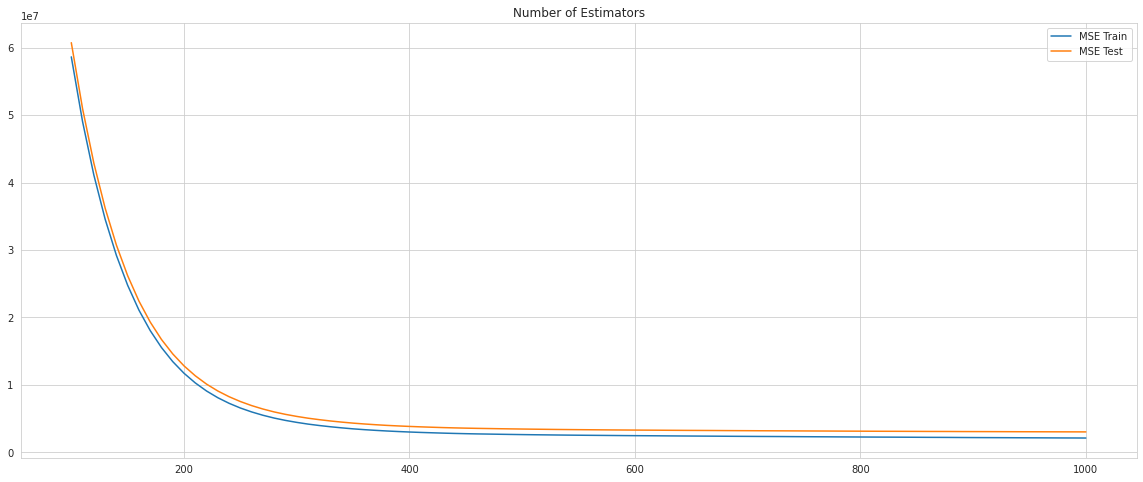

In [47]:
_ = Estimators.History(mse_train_list,mse_test_list)

In [48]:
df_estimators = pd.DataFrame({"Estimators":n_estimators,"MSE Train":mse_train_list,"MSE test":mse_test_list})

In [56]:
df_estimators.query("Estimators >800 and Estimators < 900")

,Estimators,MSE Train,MSE test
71,810,2.252244e+06,3.117369e+06
72,820,2.244980e+06,3.111294e+06
73,830,2.238693e+06,3.107420e+06
74,840,2.230378e+06,3.101069e+06
75,850,2.221979e+06,3.094851e+06
76,860,2.211843e+06,3.087721e+06
77,870,2.205886e+06,3.083223e+06
78,880,2.198115e+06,3.078738e+06
79,890,2.186850e+06,3.069444e+06


From estimator number 850 there is no significant improvement for the validation data..

In [57]:
xgb3 = XGBRegressor(max_depth = 9,
                   learning_rate=0.01,
                   n_estimators=850,
                   subsample=0.8,
                   silent=True,
                   random_state = 42,
                   verbose = 0,
                   tree_method='gpu_hist')

In [58]:
xgb3.fit(X_train,Y_train)

XGBRegressor(learning_rate=0.01, max_depth=9, n_estimators=850, random_state=42,
             silent=True, subsample=0.8, tree_method='gpu_hist', verbose=0)

In [59]:
print("MSE train: {}".format(mean_squared_error(Y_train,xgb3.predict(X_train))))
print("MSE test: {}".format(mean_squared_error(Y_test,xgb3.predict(X_test))))

MSE train: 2221978.722236222
MSE test: 3094850.7223704504


## *GridSearchCV*

We use GridSearchCV to find the best possible combination of parameters. the best combination of parameters.

### *Explanation of parameters*

* max_depth: Maximum depth of each tree.
* n_estimators: Number of decision trees.
* learning_rate: Room for improvement of each estimator.
* subsample: Number of training samples. Instead of selecting 100% of the data, you can use 80 or 85% of the data. Preventing the model from overfitting the training data
* gamma: It serves to regularize the data, preventing the model from overfitting. High gamma values are used when shooting at high depths.

In [60]:
from sklearn.model_selection import GridSearchCV

In [69]:
params1 = dict(max_depth = [7],
                   learning_rate=[0.01],
                   n_estimators=[1000],
                   subsample=[0.75,0.8,0.85],
                   silent=[True],
                   random_state = [42],
                   verbose = [0],
                  gamma = [10,12,14],
                   tree_method=['gpu_hist'])


params2 =  dict(max_depth = [9],
                   learning_rate=[0.01],
                   n_estimators=[850],
                   subsample=[0.75,0.8,0.85],
                   silent=[True],
                   random_state = [42],
                   verbose = [0],
                  gamma = [16,18,20],
                   tree_method=['gpu_hist'])

### *GridSearchCV 1*

In [70]:
grid_search1 = GridSearchCV(XGBRegressor(),params1,cv = 5)

In [71]:
grid_search1.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'gamma': [10, 12, 14], 'learning_rate': [0.01],
                         'max_depth': [7], 'n_estimators': [1000],
                         'random_state': [42], 'silent': [True],
                         'subsample': [0.75, 0.8, 0.85],
                         'tree_method': ['gpu_hist'], 'verbose': [0]})

In [72]:
grid_search1.best_params_

{'gamma': 10,
 'learning_rate': 0.01,
 'max_depth': 7,
 'n_estimators': 1000,
 'random_state': 42,
 'silent': True,
 'subsample': 0.85,
 'tree_method': 'gpu_hist',
 'verbose': 0}

### *GridSearchCV 2*

In [66]:
grid_search2 = GridSearchCV(XGBRegressor(),params2,cv = 5)

In [67]:
grid_search2.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'gamma': [16, 18, 20], 'learning_rate': [0.01],
                         'max_depth': [9], 'n_estimators': [850],
                         'random_state': [42], 'silent': [True],
                         'subsample': [0.75, 0.8, 0.85],
                         'tree_method': ['gpu_hist'], 'verbose': [0]})

In [68]:
grid_search2.best_params_

{'gamma': 16,
 'learning_rate': 0.01,
 'max_depth': 9,
 'n_estimators': 850,
 'random_state': 42,
 'silent': True,
 'subsample': 0.85,
 'tree_method': 'gpu_hist',
 'verbose': 0}

## *Model Selection*

In [73]:
models = {"Model 1":XGBRegressor(**grid_search1.best_params_),
          "Model 2":XGBRegressor(**grid_search2.best_params_)}

In [74]:
def train_model(model):

  return model.fit(X_train,Y_train)

In [75]:
for model in models.values():

  train_model(model)

In [76]:
for name,model in models.items():

  print(f"{name}: MSE Train {mean_squared_error(Y_train,model.predict(X_train))}")
  print(f"{name}: MSE Test {mean_squared_error(Y_test,model.predict(X_test))}")
  print("=====================================================================")

Model 1: MSE Train 3088417.5120324683
Model 1: MSE Test 3670214.1574856504
Model 2: MSE Train 2214555.981457809
Model 2: MSE Test 3100916.617127418


The second model has better metrics. But the first model has a more equal MSE, for the training and validation data. Therefore, I consider it more robust, since the first model has more difference between the training and validation MSE, which can mean that the model is overwhelmed with the training data.